# **Problem 1**: Logistic Regression and CIFAR-10.

In this problem you will explore the dataset CIFAR-10 and you will use multi-label (multinomial) Logistic Regression to try to classify it. You will also explore visualizing the solution.

In [ ]:
#Using GPU 
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 1.1 
Use the fetch_openml command from sklearn.datasets to import the CIFAR-10-Small data set


In [ ]:

%matplotlib inline
from sklearn.datasets import fetch_openml
# Change data_home to wherever to where you want to download your data
mnist = fetch_openml('mnist_784')

In [ ]:
cifar = fetch_openml('CIFAR_10_small')

In [ ]:
import numpy as np
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# 1.2 
Figure out how to display some of the images in this data set, and display a couple. While not high resolution, these should be recognizable if you're doing it correctly. 

In [ ]:
print("\033[1m" + "About the dataset:\n" + "\033[0m")
print(cifar['DESCR'])
print("\n--------\n")
print("\033[1m" +"FEATURES / COLUMNS:" + "\033[0m")
print(cifar['feature_names'][:10], "...", cifar['feature_names'][-1])

About the dataset:

**Author**: Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton    
**Source**: [University of Toronto](https://www.cs.toronto.edu/~kriz/cifar.html) - 2009  
**Please cite**: Alex Krizhevsky (2009) Learning Multiple Layers of Features from Tiny Images, Tech Report.

**CIFAR-10 small**  
This is a 20,000 instance sample of the original CIFAR-10 dataset. Sampled randomly and stratified, with 2000 examples per class. Training and test set are merged. Find the corresponding task for the original train-test splits.

CIFAR-10 is a labeled subset of the [80 million tiny images dataset](http://groups.csail.mit.edu/vision/TinyImages/). It (originally) consists 32x32 color images representing 10 classes of objects:  
0. airplane  
1. automobile          
2. bird          
3. cat          
4. deer          
5. dog          
6. frog          
7. horse          
8. ship          
9. truck          

The classes are completely mutually exclusive. There is no overlap between automobi

In [ ]:
print("Image Data Shape" , cifar.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", cifar.target.shape)

Image Data Shape (20000, 3072)
Label Data Shape (20000,)


In [ ]:
X = np.reshape(cifar.data, (20000, 3, 32, 32)).transpose(0,2,3,1).astype("uint8")


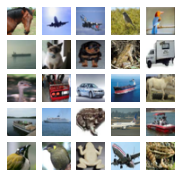

In [ ]:
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])


1.3
There are 20,000 data points. Do a train test split on 3/4 - 1/4

In [ ]:
from sklearn.model_selection import train_test_split
train_cifar_img, test_cifar_img, train_cifar_lbl, test_cifar_lbl = train_test_split(
    X, cifar.target, test_size=1/4.0, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_cifar=LogisticRegression(C=10.0,solver='saga',multi_class='multinomial',max_iter=100,penalty='l1',tol=0.1,verbose=1)

In [ ]:
lr_cifar_10=LogisticRegression(C=10.0,solver='saga',multi_class='multinomial',max_iter=100,penalty='l2',tol=0.1,verbose=1)

In [ ]:
print(train_cifar_img.shape)
train_cifar_lbl.shape

(15000, 32, 32, 3)


(15000,)

In [ ]:
nsamples, nx, ny, nz = train_cifar_img.shape
cifar_train_dataset = train_cifar_img.reshape((nsamples,nx*ny*nz))
cifar_train_dataset=cifar_train_dataset/255.0

nsamples, nx, ny, nz = test_cifar_img.shape
cifar_test_dataset = test_cifar_img.reshape((nsamples,nx*ny*nz))
cifar_test_dataset=cifar_test_dataset/255.0



You will run multi-class logistic regression on these using the cross entropy loss. You have to specify this specifically (multi_class='multinomial')

Use cross validation to see how good your accuracy can be. In this case, cross validate to find as good regularization coefficients as you can, for l1 and l2 regularization (called penalties), which are naturally supported in sklearn.linear_model.LogisticRegression. I recommend you use the solve saga.

In [ ]:
lr_cifar_10.fit(cifar_train_dataset,train_cifar_lbl)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 18 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.2s finished


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=1,
                   warm_start=False)

In [ ]:
lr_cifar.fit(cifar_train_dataset,train_cifar_lbl)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 27 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.3s finished


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.1, verbose=1,
                   warm_start=False)

In [ ]:
predictions_l1=lr_cifar.predict_proba(cifar_test_dataset)

In [ ]:
from sklearn.metrics import log_loss
cLoss=log_loss(test_cifar_lbl,predictions_l1,normalize=True)

print ("The cross entropy test data loss for l1 regularization is "+str(cLoss)+" bits")

The cross entropy test data loss for l1 regularization is 1.7280289057479077 bits


In [ ]:
train_pred_l1=lr_cifar.predict_proba(cifar_train_dataset)
cLoss=log_loss(train_cifar_lbl,train_pred_l1,normalize=True)

print ("The cross entropy train data loss for l1 regularization is "+str(cLoss)+" bits")

The cross entropy train data loss for l1 regularization is 1.6455308485253335 bits


In [ ]:
train_pred_l2=lr_cifar_10.predict_proba(cifar_train_dataset)
cLoss=log_loss(train_cifar_lbl,train_pred_l2,normalize=True)
print ("The cross entropy train data loss for l2 regularization is "+str(cLoss)+" bits")

The cross entropy train data loss for l2 regularization is 1.644723889274205 bits


In [ ]:
test_pred_l2=lr_cifar_10.predict_proba(cifar_test_dataset)
cLoss=log_loss(test_cifar_lbl,test_pred_l2,normalize=True)
print ("The cross entropy test data loss for l2 regularization is "+str(cLoss)+" bits")

The cross entropy test data loss for l2 regularization is 1.7281320943939704 bits


In [ ]:
nsamples, nx, ny, nz = test_cifar_img.shape
cifar_test_dataset = test_cifar_img.reshape((nsamples,nx*ny*nz))
predictions=lr_cifar_10.predict(cifar_test_dataset)

In [ ]:
nsamples, nx, ny, nz = X.shape
cifar_dataset = X.reshape((nsamples,nx*ny*nz))
cifar_dataset = cifar_dataset/255.0

cross validation scores with l1 regularization

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_cifar_10,cifar_dataset, cifar.target, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 20 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 20 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 20 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 20 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 19 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s finished


In [ ]:
print(scores)

[0.395   0.405   0.401   0.41075 0.39325]


cross validation scores with l2 regularization

In [ ]:
scores_cif = cross_val_score(lr_cifar, cifar_dataset, cifar.target, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 7 epochs took 34 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.4s finished


In [ ]:
print(scores_cif)

[0.39575 0.40525 0.3985  0.4105  0.391  ]


In [ ]:
score = lr_cifar.score(cifar_train_dataset, train_cifar_lbl)
print("The train score is" +str(score))
score = lr_cifar.score(cifar_test_dataset, test_cifar_lbl)
print("The test score is" +str(score))

The train score is0.44506666666666667
The test score is0.3834


In [ ]:
score = lr_cifar_10.score(cifar_train_dataset, train_cifar_lbl)
print("The train score is" +str(score))
score = lr_cifar_10.score(cifar_test_dataset, test_cifar_lbl)
print("The test score is" +str(score))

The train score is0.44426666666666664
The test score is0.3832


In [ ]:
lr_cifar_coef = np.reshape(lr_cifar_10.coef_, (10, 3, 32, 32)).transpose(0,2,3,1).astype("uint8")

In [ ]:

for i in range (0,10):
  lr_cifar=LogisticRegression(C=10.0-i,solver='saga',multi_class='multinomial',max_iter=100,penalty='l1',tol=0.1,verbose=0)
  lr_cifar.fit(cifar_train_dataset,train_cifar_lbl)
  score = lr_cifar.score(cifar_test_dataset, test_cifar_lbl)
  print("The train score for c equlas " + str(10-i)+" is " +str(score))



The train score for c equlas 10 is 0.3836
The train score for c equlas 9 is 0.382
The train score for c equlas 8 is 0.387
The train score for c equlas 7 is 0.3848
The train score for c equlas 6 is 0.3844
The train score for c equlas 5 is 0.3846
The train score for c equlas 4 is 0.3812
The train score for c equlas 3 is 0.3828
The train score for c equlas 2 is 0.384
The train score for c equlas 1 is 0.383


In [ ]:
cifar=LogisticRegression(C=0.001,solver='saga',multi_class='multinomial',max_iter=100,penalty='l1',tol=0.1,verbose=0)
lr_cifar.fit(cifar_train_dataset,train_cifar_lbl)
score = lr_cifar.score(cifar_test_dataset, test_cifar_lbl)
print("The train score for c equlas 0.01" is " +str(score))

In [ ]:
# c=1 
lr_cifar.coef_[lr_cifar.coef_< 2.2204460492503131e-16]=0.0
sparsity_l1 = np.mean(lr_cifar.coef_ == 0) * 100
print(sparsity_l1)

49.8828125


question 2 starts here

In [ ]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , mnist.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
print(train_img.shape)


(60000, 784)


In [ ]:
print(test_img.shape)


(10000, 784)


In [ ]:
print(train_lbl.shape)


(60000,)


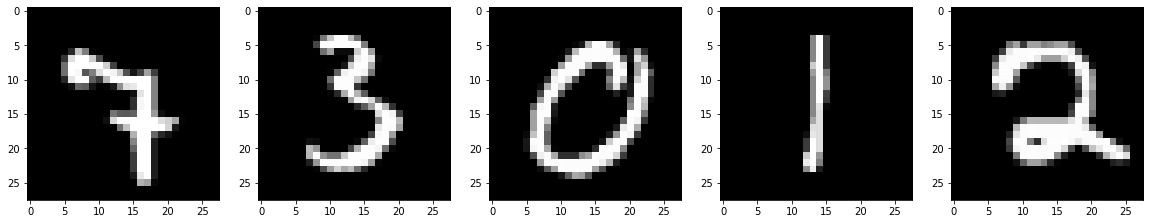

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_l1=LogisticRegression(C=1.0,solver='saga',multi_class='multinomial',penalty='l1',tol=0.1,verbose=1)
lr_l2=LogisticRegression(C=1.0,solver='saga',multi_class='multinomial',penalty='l2',tol=0.1,verbose=1)


In [ ]:
lr_l1.fit(train_img,train_lbl)
lr_l2.fit(train_img,train_lbl)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5 epochs took 23 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5 epochs took 13 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=1,
                   warm_start=False)

In [ ]:
predictions=lr_l1.predict(test_img)
prediction_l2=lr_l2.predict(test_img)


In [ ]:
test_l1_pred=lr_l1.predict_proba(test_img)
cLoss=log_loss(test_lbl,test_l1_pred,normalize=True)
print ("The cross entropy test data loss for l1 regularization is "+str(cLoss)+" bits")

The cross entropy test data loss for l1 regularization is 0.2970929464085143 bits


In [ ]:
train_l1_pred=lr_l1.predict_proba(train_img)
cLoss=log_loss(train_lbl,train_l1_pred,normalize=True)
print ("The cross entropy train data loss for l1 regularization is "+str(cLoss)+" bits")

The cross entropy train data loss for l1 regularization is 0.25563436372491577 bits


In [ ]:
test_l2_pred=lr_l2.predict_proba(test_img)
cLoss=log_loss(test_lbl,test_l2_pred,normalize=True)
print ("The cross entropy test data loss for l2 regularization is "+str(cLoss)+" bits")

The cross entropy test data loss for l2 regularization is 0.29722855210210236 bits


In [ ]:
train_l2_pred=lr_l2.predict_proba(train_img)
cLoss=log_loss(train_lbl,train_l2_pred,normalize=True)
print ("The cross entropy train data loss for l1 regularization is "+str(cLoss)+" bits")

The cross entropy train data loss for l1 regularization is 0.2556875740698382 bits


In [ ]:
score = lr_l2.score(test_img, test_lbl)
print(score)

0.918


In [ ]:
score = lr_l1.score(test_img, test_lbl)
print(score)

0.9186


Sparse vector coefficients with l1 penality

In [ ]:
coef=lr_l1.coef_

In [ ]:
#This is our matrix of weights

In [ ]:
lr_l1.coef_.shape

(10, 784)

In [ ]:
coef[0].reshape(28,28)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.01376967e-06, -7.91427795e-06,
        -4.29535590e-06, -9.76523032e-07,  5.88265933e-05,
         1.34233676e-04,  5.08465027e-05, -7.79105135e-06,
         3.09725279e-05,  1.01847639e-04,  4.83885180e-05,
        -5.83771102e-06, -2.92362002e-06, -3.99192558e-07,
         0.00000000e+00,  0.00

In [ ]:
# coef[coef< 2.2204460492503131e-16]=0.0
sparsity_l1 = np.mean(lr_l1.coef_ == 0) * 100
print(sparsity_l1)
sparsity_l2=np.mean(lr_l2.coef_==0)*100
print(sparsity_l2)

14.426020408163264
8.928571428571429


In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1



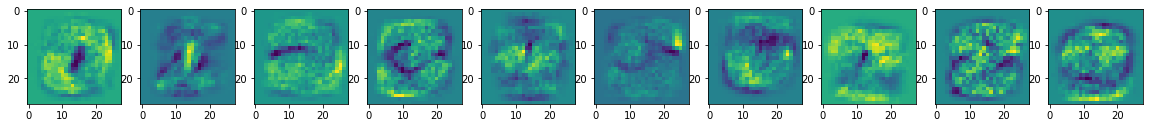

In [ ]:
plt.figure(figsize=(20,16))
for i in range(0,10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(np.reshape(coef[i], (28,28)))
    #plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

Problem 3: Revisiting Logistic Regression and MNIST.
Here we throw the kitchen sink of classical ML (i.e. pre-deep learning) on MNIST.
• Use Random Forests to try to get the best possible test accuracy on MNIST. Use Cross
Validation to find the best settings. How well can you do? You should use the accuracy
metric to compare to logistic regression. What are the hyperparameters of your best model?


• Use Gradient Boosting to do the same. Try your best to tune your hyper parameters. What
are the hyperparameters of your best model?

In [ ]:
#training random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(train_img,train_lbl)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pred=rf.predict(test_img)
print ("Classification Report")
print(classification_report(test_lbl, pred))


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       996
           1       0.99      0.99      0.99      1141
           2       0.94      0.97      0.96      1040
           3       0.96      0.94      0.95      1013
           4       0.97      0.98      0.97       962
           5       0.97      0.96      0.96       863
           6       0.97      0.98      0.98       989
           7       0.97      0.96      0.97      1064
           8       0.96      0.96      0.96       963
           9       0.94      0.94      0.94       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
scores_rf = cross_val_score(rf, mnist.data, mnist.target, cv=5)

KeyboardInterrupt: ignored

Best Accuracy with randome forest: 0.97
best Hyperparameters : criterion='gini', n_estimators=100


In [ ]:
#Standardize the data
x = train_img
x-=np.mean(train_img) # the -= means can be read as x = x- np.mean(x)

 # this calcualtes the standard deviation of the array
x/=np.std(x) # the /= means can be read as x = x/np.std(x)

# apply on test data
y = test_img
y-=np.mean(train_img) # the -= means can be read as x = x- np.mean(x)

 # this calcualtes the standard deviation of the array
y/=np.std(x) 

In [ ]:
# Best hyperparamters
param_list = [("eta", 0.08), ("max_depth", 10), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "mlogloss"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 25
early_stopping = 10
import xgboost as xgb
xgb_classif = xgb.XGBClassifier()
d_train = xgb.DMatrix(x, label=train_lbl)
d_val = xgb.DMatrix(test_img, label=test_lbl)
eval_list = [(d_train, "train"), (d_val, "validation")]
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

[0]	train-mlogloss:1.99918	validation-mlogloss:2.28492
Multiple eval metrics have been passed: 'validation-mlogloss' will be used for early stopping.

Will train until validation-mlogloss hasn't improved in 10 rounds.
[1]	train-mlogloss:1.7816	validation-mlogloss:2.27173
[2]	train-mlogloss:1.61054	validation-mlogloss:2.25427
[3]	train-mlogloss:1.469	validation-mlogloss:2.24896
[4]	train-mlogloss:1.34872	validation-mlogloss:2.24393
[5]	train-mlogloss:1.2447	validation-mlogloss:2.23388
[6]	train-mlogloss:1.15397	validation-mlogloss:2.22756
[7]	train-mlogloss:1.07317	validation-mlogloss:2.22201
[8]	train-mlogloss:1.00138	validation-mlogloss:2.21937
[9]	train-mlogloss:0.936609	validation-mlogloss:2.21443
[10]	train-mlogloss:0.876838	validation-mlogloss:2.21349
[11]	train-mlogloss:0.822955	validation-mlogloss:2.2041
[12]	train-mlogloss:0.77379	validation-mlogloss:2.19349
[13]	train-mlogloss:0.728176	validation-mlogloss:2.19078
[14]	train-mlogloss:0.686619	validation-mlogloss:2.1849
[15]	tra

In [ ]:
from sklearn.metrics import accuracy_score
d_test = xgb.DMatrix(data=y)
y_pred = bst.predict(d_test)
x.astype(int)
xg_score = accuracy_score(y_pred, np.array(test_lbl).astype(int))
print("xg_score {}".format(xg_score))

xg_score 0.2399


In [ ]:
'''Gradient Boosting '''
'''we also played around with gradient bbosting for this question'''
from sklearn.ensemble import GradientBoostingClassifier

gr_boost_minst = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0, max_depth=10, random_state=0, verbose = 1).fit(x,train_lbl)
gr_boost_minst_score = gr_boost_minst.score(y, test_lbl)
print("gradient boosting mnist score")
gr_boost_minst_score

Problem 4: Revisiting Logistic Regression and CIFAR-10.As before, we’ll throw the kitchen sink of classical ML (i.e.  pre-deep learning) on CIFAR-10.  Keepin mind that CIFAR-10 is a few times larger.•What is the best accuracy you can get on the test data, by tuning Random Forests?  Whatare the hyperparameters of your best model?•What  is  the  best  accuracy  you  can  get  on  the  test  data,  by  tuning  any  model  includingGradient boosting?  What are the hyperparameters of your best model?

In [ ]:
'''train_cifar_img, test_cifar_img, train_cifar_lbl, test_cifar_lbl = train_test_split(
    X, cifar.target, test_size=1/4.0, random_state=0)'''

#training random Forest
from sklearn.ensemble import RandomForestClassifier


rf_cifar=RandomForestClassifier(n_estimators=100)
rf_cifar.fit(cifar_train_dataset,train_cifar_lbl)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
n_estimators_list = list(range(10,220,50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)
params_grid


Number of combinations =  1600


{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'n_estimators': [10, 60, 110, 160, 210]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
## Hyperparameter tuning with randomizedSearchCV
model_rf = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid,
                              n_iter=50,
                              cv=3,
                              scoring='f1_micro',
                              return_train_score=True,
                              verbose=2)
#rf_cifar.fit(cifar_train_dataset,train_cifar_lbl)
#cifar_dataset, cifar.target
model_rf.fit(cifar_dataset, cifar.target)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=5, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=5, criterion=entropy, total=   4.7s
[CV] n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=5, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=5, criterion=entropy, total=   4.4s
[CV] n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=5, criterion=entropy 
[CV]  n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.035, max_features=log2, max_depth=5, criterion=entropy, total=   4.4s
[CV] n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.005, max_features=log2, max_depth=None, criterion=entropy 
[CV]  n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.005, max_features=log2, max_depth=None, criterion=entropy, total=   8.6s
[CV] n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.005, max_features=log2, max_depth=None, criterion=entropy 
[CV]  n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.005, max_features=log2, max_depth=None, criterion=entropy, total=   8.6s
[CV] n_estimators=110, min_samples_split=0.035, min_samples_leaf=0.

In [ ]:
model_rf.best_params_


What is the best accuracy you can get on the test data, by tuning Random Forests?  

What are the hyperparameters of your best model?

Ans : 
{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.015,
 'n_estimators': 160}


In [ ]:



'''
{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.015,
 'n_estimators': 160}'''


model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=10,
                                      max_features='auto',
                                      min_samples_leaf=0.005,
                                      min_samples_split=10,
                                      n_estimators=160, verbose=1)


model_rf_fin.fit(cifar_train_dataset, train_cifar_lbl)






In [ ]:
prediction = model_rf_fin.predict(cifar_test_dataset)
from sklearn.metrics import precision_score

print("precision {}".format(precision_score(test_cifar_lbl, prediction, average='micro')))
from sklearn.metrics import recall_score


print("recall {}".format(recall_score(test_cifar_lbl, prediction, average='micro')))
from sklearn.metrics import f1_score


print("f1 score {}".format(f1_score(test_cifar_lbl, prediction, average='micro')))
from sklearn.metrics import accuracy_score

print("accuracy_score {}".format(accuracy_score(test_cifar_lbl, prediction)))

prediction_train = model_rf_fin.predict(cifar_train_dataset)
from sklearn.metrics import precision_score

print("precision {}".format(precision_score(train_cifar_lbl, prediction_train, average='micro')))
from sklearn.metrics import recall_score


print("recall {}".format(recall_score(train_cifar_lbl, prediction_train, average='micro')))
from sklearn.metrics import f1_score


print("f1 score {}".format(f1_score(train_cifar_lbl, prediction_train, average='micro')))
from sklearn.metrics import accuracy_score

print("accuracy_score {}".format(accuracy_score(train_cifar_lbl, prediction_train)))



In [ ]:
'''Gradient Boosting '''

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(cifar_train_dataset,train_cifar_lbl)
clf.score(cifar_test_dataset, test_cifar_lbl)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

CNN Sequenctial method

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
## Model Architecture :
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

CNN hyperparamters used :
3 convolution layers with number of filters 32, 64 and 64 respectively. kernel size 3 by 3. activation 'relu', with dense layer of 64 neurons and final dense layer with 10 neurons.

In [ ]:
with tf.device('/device:GPU:0'):

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  train_cifar_img_norm = train_cifar_img/255.0
  test_cifar_img_norm = test_cifar_img/255.0
  from keras.callbacks import EarlyStopping

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
  history = model.fit(train_cifar_img_norm, train_cifar_lbl.astype(np.float), epochs=100, 
                      validation_data=(test_cifar_img_norm, test_cifar_lbl.astype(np.float)), callbacks=[es])


157/157 - 0s - loss: 1.3049 - accuracy: 0.6258
0.6258000135421753


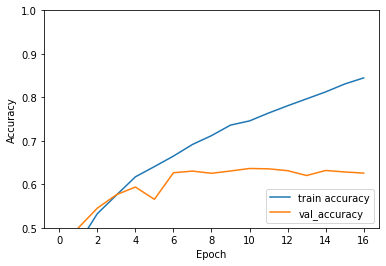

In [ ]:
  plt.plot(history.history['accuracy'], label='train accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_cifar_img_norm,  test_cifar_lbl.astype(np.float), verbose=2)
  print(test_acc)

In [ ]:
# import libraries
# CNN with functional API
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Maximum, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
# parameters for the network
image_size = 32
input_shape = (image_size, image_size, 3)
batch_size = 128
kernel_size = 3
filters = 48
dropout = 0.25
num_labels = 10





CNN hyperparamters used :
6 convolution layers with number of filters 48 which doubles after every 2 conv layers. kernel size 3 by 3. activation 'relu',dropout =0.25. batch_size = 128, with two consecutive dense layer of 512, 256 neurons respectively. and final dense layer with 10 neurons and softmax activation.

In [ ]:
# utiliaing functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
            kernel_size=kernel_size,
            activation='relu', padding="same")(inputs)

y = Conv2D(filters=filters,
            kernel_size=kernel_size,
            activation='relu')(y)

y = MaxPooling2D()(y)
y = Dropout(dropout)(y)

y = Conv2D(filters=2*filters,
            kernel_size=kernel_size,
            activation='relu', padding="same")(y)

y = Conv2D(filters=2*filters,
            kernel_size=kernel_size,
            activation='relu')(y)

y = MaxPooling2D()(y)
y = Dropout(dropout)(y)

y = Conv2D(filters=4*filters,
            kernel_size=kernel_size,
            activation='relu', padding="same")(y)

y = Conv2D(filters=4*filters,
            kernel_size=kernel_size,
            activation='relu')(y)

y = MaxPooling2D()(y)
y = Dropout(dropout)(y)

# convert image to vector 
y = Flatten()(y)
y = Dense(512, activation='relu')(y)
y = Dropout(2*dropout)(y)
y = Dense(256, activation='relu')(y)
y = Dropout(2*dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# model building by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 96)        41568     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 96)        83040 

In [ ]:
a = test_cifar_lbl.astype(np.int)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1



temp = train_cifar_lbl.astype(np.int)
train_lbls_one_hot = np.zeros((temp.size, temp.max()+1))
train_lbls_one_hot[np.arange(temp.size),temp] = 1

In [ ]:
train_cifar_img_norm = train_cifar_img/255.0
test_cifar_img_norm = test_cifar_img/255.0

with tf.device('/device:GPU:0'):

 filepath = 'my_model_best.hdf5'



  

 model = Model(inputs=inputs, outputs=outputs)

 model.compile(loss='categorical_crossentropy',
		optimizer='adam',
		metrics=['accuracy'])


  

 model.fit(train_cifar_img_norm, 
						train_lbls_one_hot,
						validation_data=(test_cifar_img_norm, b),
						epochs=100,
						batch_size=batch_size)


	# accuracy evaluation
 model.save('my_model.h5')

 score = model.evaluate(test_cifar_img_norm, b,
		batch_size=batch_size,
		verbose=0)

 print("nTest accuracy: %.1f%%" % (100.0 * score[1]))
 

  

  


Epoch 1/100
118/118 [==============================] - 7s 48ms/step - loss: 2.1360 - accuracy: 0.1824 - val_loss: 1.9484 - val_accuracy: 0.2170
Epoch 2/100
118/118 [==============================] - 5s 42ms/step - loss: 1.8859 - accuracy: 0.2629 - val_loss: 1.6781 - val_accuracy: 0.3540
Epoch 3/100
118/118 [==============================] - 5s 42ms/step - loss: 1.6726 - accuracy: 0.3691 - val_loss: 1.5821 - val_accuracy: 0.4274
Epoch 4/100
118/118 [==============================] - 5s 44ms/step - loss: 1.5184 - accuracy: 0.4382 - val_loss: 1.3444 - val_accuracy: 0.4886
Epoch 5/100
118/118 [==============================] - 5s 42ms/step - loss: 1.3854 - accuracy: 0.4921 - val_loss: 1.4202 - val_accuracy: 0.4814
Epoch 6/100
118/118 [==============================] - 5s 42ms/step - loss: 1.2881 - accuracy: 0.5321 - val_loss: 1.2255 - val_accuracy: 0.5520
Epoch 7/100
118/118 [==============================] - 5s 42ms/step - loss: 1.1846 - accuracy: 0.5713 - val_loss: 1.0850 - val_accuracy: